<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-lib-and-define-helper-functions" data-toc-modified-id="Load-lib-and-define-helper-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load lib and define helper functions</a></span></li><li><span><a href="#Step-1:-Training-with-BCE-loss" data-toc-modified-id="Step-1:-Training-with-BCE-loss-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 1: Training with BCE loss</a></span><ul class="toc-item"><li><span><a href="#U-ones" data-toc-modified-id="U-ones-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>U-ones</a></span></li><li><span><a href="#U-zeros" data-toc-modified-id="U-zeros-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>U-zeros</a></span></li><li><span><a href="#U-defaults" data-toc-modified-id="U-defaults-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>U-defaults</a></span></li><li><span><a href="#U-one-Smooth" data-toc-modified-id="U-one-Smooth-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>U-one Smooth</a></span></li><li><span><a href="#U-default-smooth" data-toc-modified-id="U-default-smooth-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>U-default smooth</a></span></li></ul></li></ul></div>

# Load lib and define helper functions

In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path

# from libauc.losses import AUCMLoss, CrossEntropyLoss, AUCM_MultiLabel
# from libauc.optimizers import PESG, Adam
# from libauc.models import DenseNet121, DenseNet169
# import torch 
# from PIL import Image
# import numpy as np
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset
# from sklearn.metrics import roc_auc_score
# import pandas as pd
# from tqdm import tqdm
# from tqdm import tqdm_notebook

from dataloader import *
from trainer import *
import AUCMMS
from fastai.vision.all import *

DATA = '/media/samsung/chexpert/CheXpert-v1.0-small/'


# Step 1: Training with BCE loss

## U-ones

In [15]:
data_params={
    'uncertainty_method':'one',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':0.12,
    'sample_seed':123,
    'batch_size': 128,
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [16]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.482768,0.514239,0.854897,[0.80488189 0.81444964 0.878125 0.87983631 0.89719203],00:50
1,0.463927,0.405489,0.870681,[0.81275591 0.81127451 0.87261029 0.91830357 0.93846241],00:51
2,0.446719,0.481097,0.862453,[0.78125984 0.82726159 0.85367647 0.92083333 0.9292346 ],00:51
3,0.414585,0.457583,0.853736,[0.77343832 0.80141488 0.84604779 0.92239583 0.92538496],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8548969743533714.


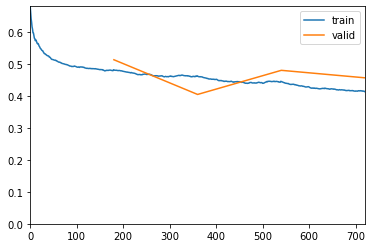

Better model found at epoch 1 with roc_auc_score value: 0.8706813380564482.


In [17]:
WEIGHT_NAME='densenet_bce_uone_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.497815,0.604904,0.825155,[0.72293963 0.80358734 0.84908088 0.88683036 0.86333786],00:52
1,0.469430,0.445629,0.853945,[0.812021 0.79127674 0.85275735 0.90379464 0.90987319],00:51
2,0.450649,0.488655,0.857754,[0.80776903 0.81043895 0.83740809 0.91473214 0.91842165],00:52
3,0.419365,0.448716,0.853438,[0.77753281 0.80598262 0.8359375 0.92291667 0.92481884],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8251552156778184.


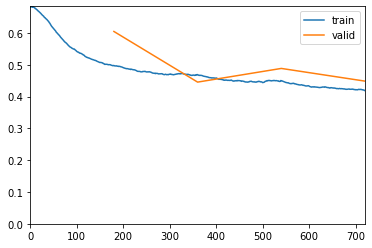

Better model found at epoch 1 with roc_auc_score value: 0.8539445839094718.
Better model found at epoch 2 with roc_auc_score value: 0.8577539713642297.


In [18]:
WEIGHT_NAME='densenet_bce_uone_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

## U-zeros

In [ ]:
data_params={
    'uncertainty_method':'zero',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':0.12,
    'sample_seed':123,
    'batch_size': 128,
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [ ]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

In [ ]:
WEIGHT_NAME='densenet_bce_uzero_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

In [ ]:
WEIGHT_NAME='densenet_bce_uzero_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

## U-defaults

In [12]:
data_params={
    'uncertainty_method':'default',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':0.12,
    'sample_seed':123,
    'batch_size': 128,
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.417437,0.591069,0.860617,[0.82251969 0.83745544 0.85477941 0.89962798 0.88870018],00:50
1,0.402620,0.520128,0.854777,[0.7832021 0.79957665 0.89816176 0.88058036 0.91236413],00:50
2,0.383271,0.474649,0.864289,[0.81259843 0.77774064 0.8921875 0.91919643 0.91972373],00:51
3,0.358219,0.495152,0.862641,[0.79700787 0.7839238 0.88648897 0.92730655 0.91847826],00:52


Better model found at epoch 0 with roc_auc_score value: 0.860616538174823.


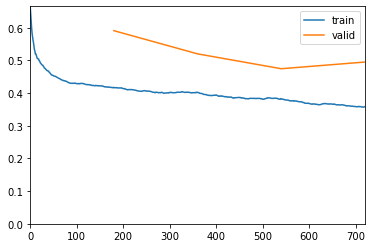

Better model found at epoch 2 with roc_auc_score value: 0.8642893454727133.


In [13]:
WEIGHT_NAME='densenet_bce_udefault_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.434958,0.663469,0.822774,[0.77448819 0.78225267 0.85147059 0.86830357 0.83735281],00:53
1,0.407411,0.481887,0.877696,[0.8424147 0.81511809 0.91691176 0.90982143 0.90421196],00:52
2,0.387989,0.500801,0.868598,[0.80671916 0.80459002 0.88722426 0.92529762 0.91915761],00:52
3,0.362683,0.485926,0.860674,[0.7712336 0.79935383 0.88014706 0.92849702 0.92413949],00:52


Better model found at epoch 0 with roc_auc_score value: 0.82277356608161.


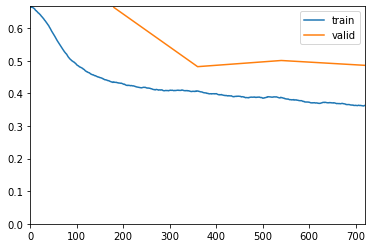

Better model found at epoch 1 with roc_auc_score value: 0.8776955881306805.


In [14]:
WEIGHT_NAME='densenet_bce_udefault_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

## U-one Smooth

In [19]:
data_params={
    'uncertainty_method':'smoothing',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':0.12,
    'sample_seed':123,
    'batch_size': 128,
    'smooth_lower': 0.55,
    'smooth_upper': 0.85
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [20]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.456425,0.559724,0.862199,[0.84860892 0.8193516 0.87178309 0.87745536 0.89379529],00:51
1,0.440149,0.428720,0.873889,[0.79133858 0.83244207 0.89852941 0.90974702 0.93738678],00:51
2,0.423613,0.472822,0.860117,[0.79007874 0.81233289 0.84705882 0.91622024 0.93489583],00:51
3,0.397033,0.467922,0.856861,[0.78619423 0.79456328 0.84678309 0.9171131 0.93965127],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8621988526791625.


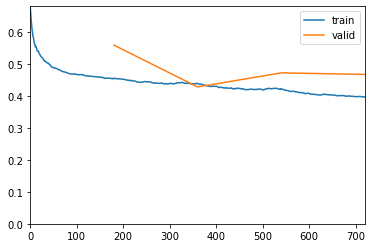

Better model found at epoch 1 with roc_auc_score value: 0.8738887722699797.


In [21]:
WEIGHT_NAME='densenet_bce_u1smooth_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.473682,0.703499,0.835754,[0.78766404 0.79584447 0.87950368 0.8797619 0.83599411],00:53
1,0.445933,0.422663,0.864677,[0.80194226 0.81300134 0.87573529 0.90669643 0.9260077 ],00:52
2,0.427758,0.491350,0.853250,[0.79905512 0.80765374 0.82490809 0.90245536 0.93217844],00:52
3,0.400900,0.464768,0.851842,[0.77433071 0.79233512 0.85404412 0.9077381 0.93076313],00:52


Better model found at epoch 0 with roc_auc_score value: 0.8357536419398764.


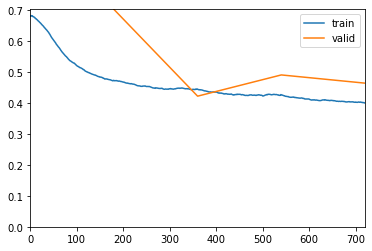

Better model found at epoch 1 with roc_auc_score value: 0.8646766032161363.


In [22]:
WEIGHT_NAME='densenet_bce_u1smooth_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

## U-default smooth

In [26]:
data_params={
    'uncertainty_method':'default-smoothing',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':0.12,
    'sample_seed':123,
    'batch_size': 128
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [27]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.420107,0.572768,0.855224,[0.79212598 0.81807041 0.88419118 0.90044643 0.88128397],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8552235933334928.


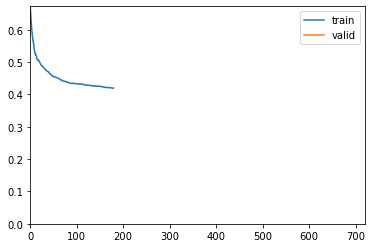

In [ ]:
WEIGHT_NAME='densenet_bce_udefaultsmooth_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

In [ ]:
WEIGHT_NAME='densenet_bce_udefaultsmooth_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)